# **Семинар 8. Корреляция**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

## Свойства корреляции

**Корреляция** - степень линейной взаимосвязи между двумя величинами

1. Изменяется от -1 до 1
2. Положительный коэффициент корреляции свидетельствует о прямой зависимости
3. Отрицательный коэффициент корреляции свидетельствует об обратной зависимости
4. Если корреляция 0 (близка к 0), то между признаками отсутствует линейная зависимость


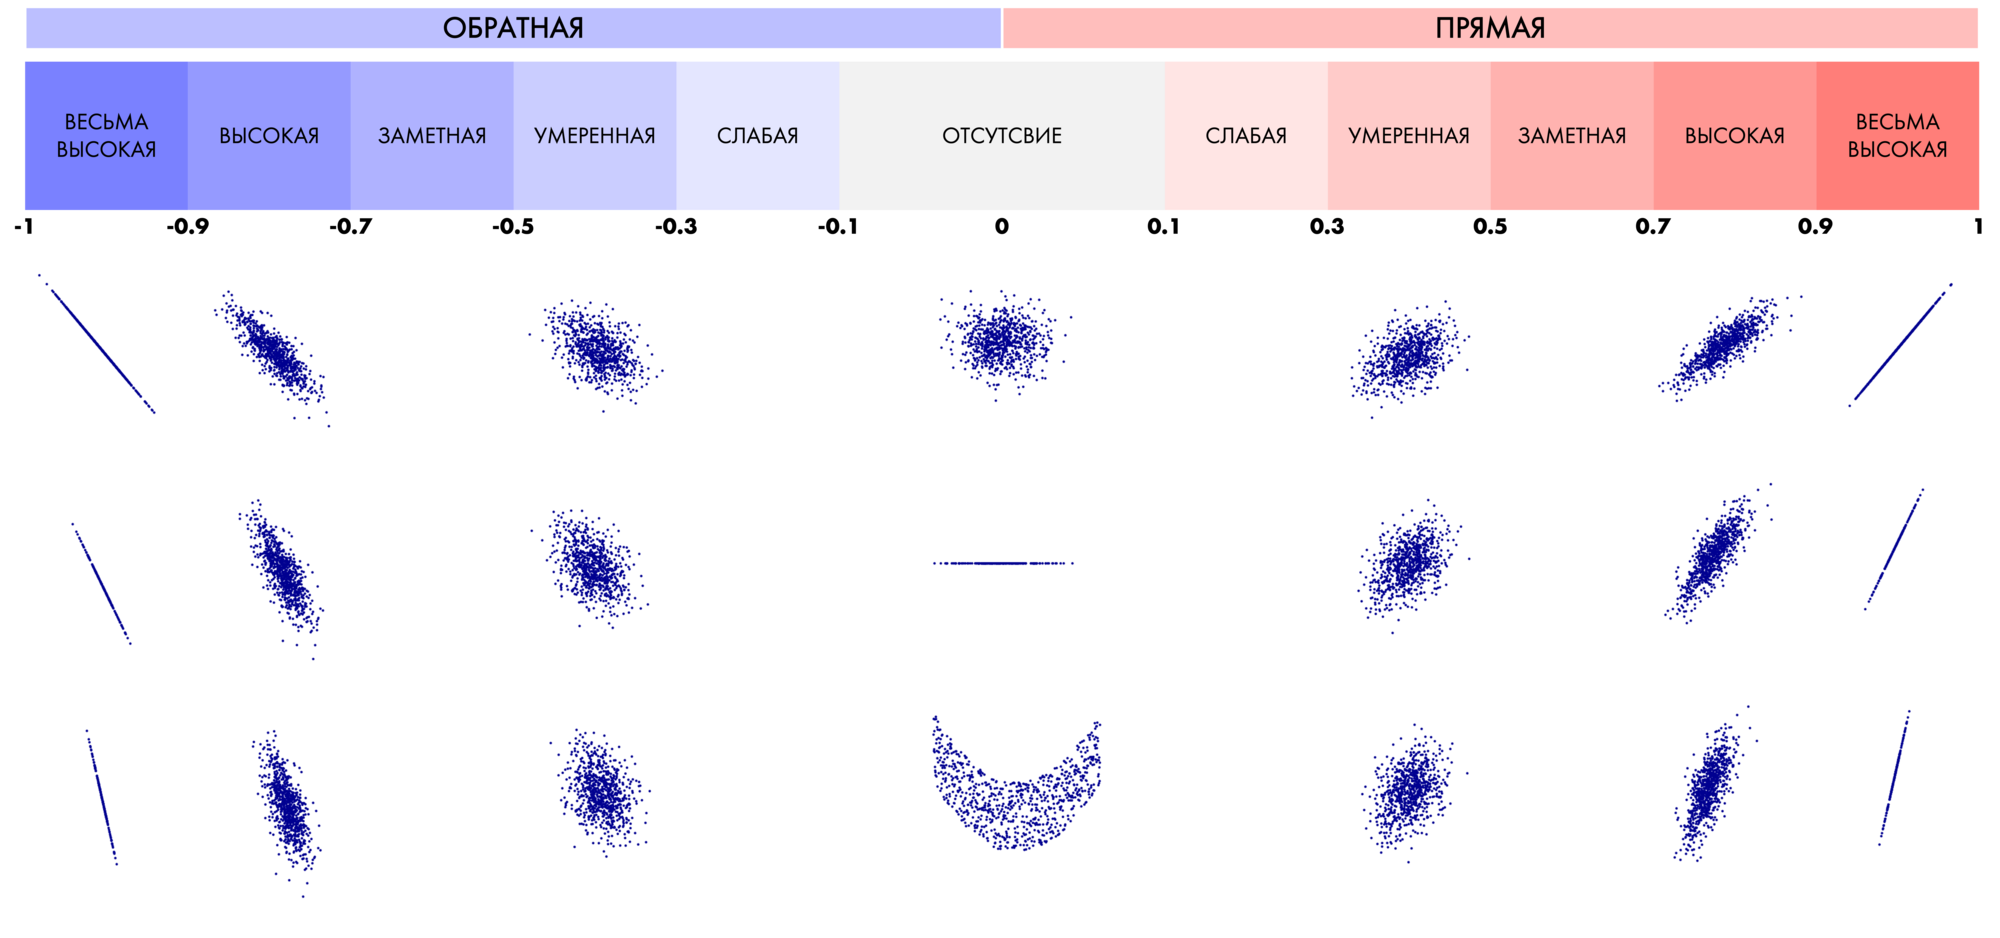

**ОБРАТНАЯ ЛИНЕЙНАЯ ЗАВИСИМОСТЬ**
- $\text{corr} < 0$
- При **увеличении** одного показателя другой будет **снижаться**

**ОТСУТСТВИЕ ЛИНЕЙНОЙ ЗАВИСИМОСТИ**
- $\text{corr} = 
0$
- Между признаками отсутвует линейная взаимосвязь

**ПРЯМАЯ ЛИНЕЙНАЯ ЗАВИСИМОСТЬ**
- $\text{corr} > 0$
- При **увеличении** одного показателя другой будет **увеличиваться**
- При **снижении** одного показателя другой будет **снижаться**

**❗️ВАЖНО❗️**
1. Корреляция **НЕ** подразумевает причинно-следственной связи. Если между признаками А и Б есть тесная взаимосвязь, то мы **НЕ** можем говорить, что А **влияет** на Б или Б **влияет** на А. Можно посмотреть на [сайте](https://tylervigen.com/spurious-correlations), какие выводы можно сделать, если подразумевать причинно-следственную связь в корреляции
2. Корреляция **чувствительна к выбросам**
3. Коэффициент корреляции Пирсона **НЕ фиксирует нелинейные отношения** между двумя переменными.

## [A8](https://edu.hse.ru/mod/quiz/view.php?id=1220247)

### Пример-1

Укажите между какими признаками самая сильная обратная корреляция.

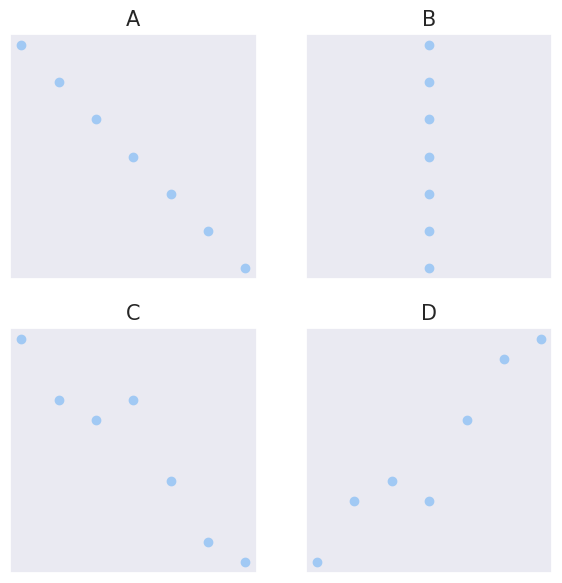

## [А9](https://edu.hse.ru/mod/quiz/view.php?id=1220248)

### Пример-1

Экономист Степан хочет понять, как годовой валовый внутренний продукт (ВВП) некоторой страны зависит от среднего годового уровня безработицы (УБ) этой страны (обе величины являются непрерывными). Оказалось, что выборочный коэффициент корреляции между ВВП и УБ равен -0.12. Выберите все верные утверждения.

Выберите один или несколько ответов:

+ Между переменными ВВП и УБ существует отрицательная слабовыраженная линейная взаимосвязь.


+ Рассматривая только коэффициент корреляции, нельзя однозначно определить, существует ли причинно-следственная связь между ВВП и УБ.


+ Между переменными ВВП и УБ не существует положительной нелинейной связи.


+ ВВП и УБ являются независимыми величинами.

## Практика

Работаем с данными по автомобилям:

- `Car_Name` - название автомобиля
- `Selling_Price` - цена покупки автомобиля (в млн. рублей)
- `Present_Price` - текущая цена автомобиля (в млн. рублей)
- `Owner` - наличие предыдущих владельцев (1 - были, 0 - нет)
- `Kms_Driven` - пробег
- `Age` - возраст автомобиля (в годах)

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/cars.csv')
df.head()

,Car_Name,Selling_Price,Present_Price,Owner,Kms_Driven,Age
0,ritz,3.35,5.59,0,27000,10
1,sx4,4.75,9.54,0,43000,11
2,ciaz,7.25,9.85,0,6900,7
3,wagon r,2.85,4.15,0,5200,13
4,swift,4.60,6.87,0,42450,10


### Рассчет коэффицента корреляции `.corr()`

**Коэффициент корреляции Пирсона** позволяет оценить силу и направление линейной взаимосвязи между **ЧИСЛОВЫМИ ДАННЫМИ**


**ПАРНАЯ КОРРЕЛЯЦИЯ**

``` python
    table_name['column_name_1'].corr(table_name['column_name_2'])
```

In [24]:
df['Selling_Price'].corr(df['Present_Price']) # если поменять местами - ответ не изменится

np.float64(0.8789825451614951)

Визулизация линейной взаимосвязи - график рассеяния

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

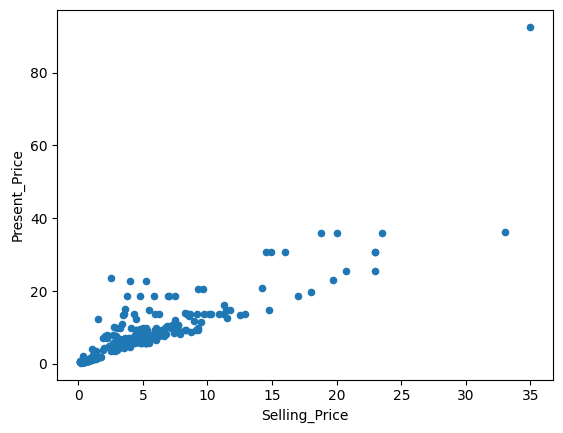

In [3]:
df.plot('Selling_Price', 'Present_Price', kind = "scatter")

+ Между признаками существует высокая прямая линейная зависимость
+ При увеличении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже увеличится
+ При снижении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже увеличится

**КОРРЕЛЯЦИОННАЯ МАТРИЦА**

Будет ошибка, если в `table_name` присутствуют нечисловые столбцы. 


``` python
    table_name.corr()
```

Можно посчитать корреляцию только между числовыми признаками, присутствующими в `table_name`:

``` python
    table_name.corr(numeric_only = True)
```

In [25]:
df.corr(numeric_only = True)

,Selling_Price,Present_Price,Owner,Kms_Driven,Age
Selling_Price,1.000000,0.878983,-0.101445,0.029187,-0.236141
Present_Price,0.878983,1.000000,-0.055443,0.203647,0.047584
Owner,-0.101445,-0.055443,1.000000,0.021857,0.146629
Kms_Driven,0.029187,0.203647,0.021857,1.000000,0.524342
Age,-0.236141,0.047584,0.146629,0.524342,1.000000


+ По центральной диагонали 1 (автокорреляция)
+ Симметрична относительна центральной диагонали

**Дополнительно**

Визуализировать матрицу корреляции можно с помощью библиотеки `seaborn`. Чтобы ее установить, выполните следующую ячейку:

In [26]:
# !pip intall seaborn -q

In [27]:
# импортируем библиотеку
import seaborn as sns

График для отображения корреляционной матрицы - тепловая карта (heatmap). Документацию можете глянуть [здесь](https://seaborn.pydata.org/generated/seaborn.heatmap.html), у seaborn они красивые :) 

```python
    sns.heatmap(correlation_matrix)
```

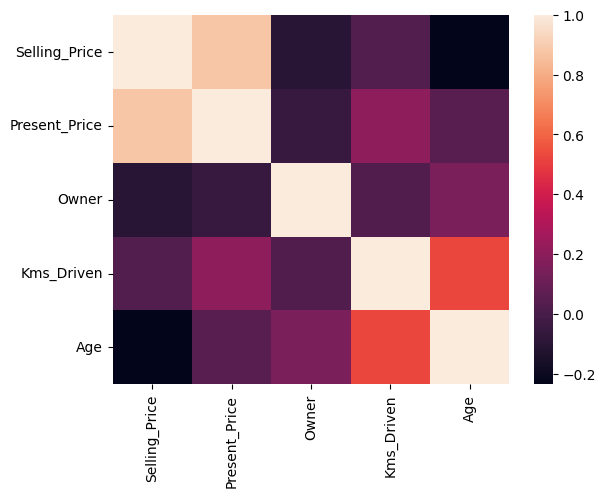

In [28]:
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix);

Можно отображать значения корреляции на графике:
 
 ```python
    sns.heatmap(correlation_matrix, annot=True)
```

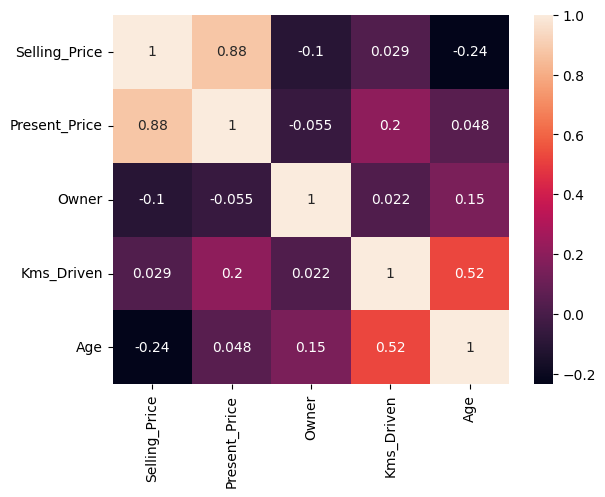

In [29]:
sns.heatmap(corr_matrix, annot=True);

Можно изменить и цветовую диаграмму - за это отвечает атрибут `cmap`. Какие-то можно также глянуть в [документации](https://seaborn.pydata.org/tutorial/color_palettes.html) 

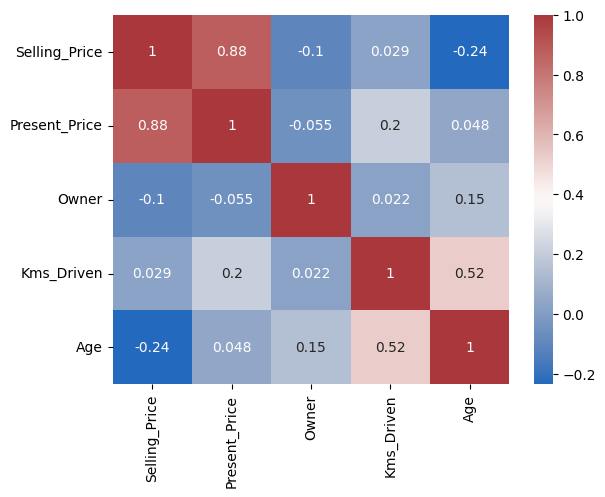

In [30]:
sns.heatmap(corr_matrix, annot=True, cmap='vlag');